Welcome to Roy and Naama Project - predicting the next War in Israel.
In this project we wanted to check if the parameters that we have collected are related to being at war, and to try and create a model that predicts war according to the parameters. 

In [558]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
%matplotlib inline

the first thing we will do is create the dataframe with the following columns:
date - everyday since 1/1/2006 - 30/5/2023
Rain Amount (Jerusaelm) - the amount of rain in mm that was measured 
Unemployed Citizens - the percentage of civilians that are unemployed (this data is collected yearly and not daily)
National Security in YNET - the number of articles published in YNET that are related to national security in general
Gaza in YNET - the number of articles published in YNET that are related to Gaza 
Days Since Last Elections - the number of days passed since the last elections
USD\ILS - how much shekels are needed to buy one US dollar
War? - are we currently at war\any operation, small or big (envolving ground forces or not)

In [559]:
df = pd.DataFrame(pd.date_range(start='2006-01-01', end='2023-05-30'), columns=['date'])
columns=['Rain Amount(Jerusalem)','Unemployed Citizens','National Security in YNET','Gaza in YNET','Days Since Last Elections','USD\ILS','War?']
for i in columns:
    df[i]=np.nan
df

date  Rain Amount(Jerusalem)  Unemployed Citizens  \
0    2006-01-01                     NaN                  NaN   
1    2006-01-02                     NaN                  NaN   
2    2006-01-03                     NaN                  NaN   
3    2006-01-04                     NaN                  NaN   
4    2006-01-05                     NaN                  NaN   
...         ...                     ...                  ...   
6354 2023-05-26                     NaN                  NaN   
6355 2023-05-27                     NaN                  NaN   
6356 2023-05-28                     NaN                  NaN   
6357 2023-05-29                     NaN                  NaN   
6358 2023-05-30                     NaN                  NaN   

      National Security in YNET  Gaza in YNET  Days Since Last Elections  \
0                           NaN           NaN                        NaN   
1                           NaN           NaN                        NaN   
2                           NaN           NaN                        NaN   
3                           NaN           NaN                        NaN   
4                           NaN           NaN                        NaN   
...                         ...           ...                        ...   
6354                        NaN           NaN                        NaN   
6355                        NaN           NaN                        NaN   
6356                        NaN           NaN                        NaN   
6357                        NaN           NaN                        NaN   
6358                        NaN           NaN                        NaN   

      USD\ILS  War?  
0         NaN   NaN  
1         NaN   NaN  
2         NaN   NaN  
3         NaN   NaN  
4         NaN   NaN  
...       ...   ...  
6354      NaN   NaN  
6355      NaN   NaN  
6356      NaN   NaN  
6357      NaN   NaN  
6358      NaN   NaN  

[6359 rows x 8 columns]

we will begin with scraping the information about the unemployed citizens, as mentioned before - this data is collected yearly and not daily. we will use beautiful soup and after extracting the data into a list we will strip it and insert it into our df.

In [560]:
Unemployed_lst = []
Unemployed_link = 'https://www.macrotrends.net/countries/ISR/israel/unemployment-rate'
result = requests.get(Unemployed_link).text
soup = BeautifulSoup(result, "html.parser")
content = soup.find(class_ = "col-xs-6")
td = content.find_all("td")
for data in td:
    Unemployed_lst.append(data.text)
Years_lst = Unemployed_lst[0:48:3]
Unemployed_lst = []
for data in td:
    value=data.text.strip('%')
    Unemployed_lst.append(float(value)/100)
Unemployed_short_lst = Unemployed_lst[1:49:3]
Unemployed_short_lst.reverse()
Years_lst.reverse()
print(Unemployed_short_lst)
print(Years_lst)

[0.10710000000000001, 0.09380000000000001, 0.077, 0.0953, 0.0848, 0.07139999999999999, 0.06860000000000001, 0.0621, 0.058899999999999994, 0.0525, 0.048, 0.042199999999999994, 0.04, 0.038, 0.0433, 0.050499999999999996]
['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


here we insert the scraped data into the df. 

In [561]:
for year in Years_lst:
    value = Unemployed_short_lst[Years_lst.index(year)]
    for i in df.index:
        cur_year = df['date'][i].year
        if(str(cur_year) == year):
            df.at[i, 'Unemployed Citizens'] = value
df

date  Rain Amount(Jerusalem)  Unemployed Citizens  \
0    2006-01-01                     NaN               0.1071   
1    2006-01-02                     NaN               0.1071   
2    2006-01-03                     NaN               0.1071   
3    2006-01-04                     NaN               0.1071   
4    2006-01-05                     NaN               0.1071   
...         ...                     ...                  ...   
6354 2023-05-26                     NaN                  NaN   
6355 2023-05-27                     NaN                  NaN   
6356 2023-05-28                     NaN                  NaN   
6357 2023-05-29                     NaN                  NaN   
6358 2023-05-30                     NaN                  NaN   

      National Security in YNET  Gaza in YNET  Days Since Last Elections  \
0                           NaN           NaN                        NaN   
1                           NaN           NaN                        NaN   
2                           NaN           NaN                        NaN   
3                           NaN           NaN                        NaN   
4                           NaN           NaN                        NaN   
...                         ...           ...                        ...   
6354                        NaN           NaN                        NaN   
6355                        NaN           NaN                        NaN   
6356                        NaN           NaN                        NaN   
6357                        NaN           NaN                        NaN   
6358                        NaN           NaN                        NaN   

      USD\ILS  War?  
0         NaN   NaN  
1         NaN   NaN  
2         NaN   NaN  
3         NaN   NaN  
4         NaN   NaN  
...       ...   ...  
6354      NaN   NaN  
6355      NaN   NaN  
6356      NaN   NaN  
6357      NaN   NaN  
6358      NaN   NaN  

[6359 rows x 8 columns]

as you can clearly see from the list of the data and from the df, there is no data for the years of 2022-2023 in the website we chose. so, we will complete the data using the median. 

In [562]:
df['Unemployed Citizens'].fillna(value=df['Unemployed Citizens'].median(),inplace=True)
df

date  Rain Amount(Jerusalem)  Unemployed Citizens  \
0    2006-01-01                     NaN               0.1071   
1    2006-01-02                     NaN               0.1071   
2    2006-01-03                     NaN               0.1071   
3    2006-01-04                     NaN               0.1071   
4    2006-01-05                     NaN               0.1071   
...         ...                     ...                  ...   
6354 2023-05-26                     NaN               0.0605   
6355 2023-05-27                     NaN               0.0605   
6356 2023-05-28                     NaN               0.0605   
6357 2023-05-29                     NaN               0.0605   
6358 2023-05-30                     NaN               0.0605   

      National Security in YNET  Gaza in YNET  Days Since Last Elections  \
0                           NaN           NaN                        NaN   
1                           NaN           NaN                        NaN   
2                           NaN           NaN                        NaN   
3                           NaN           NaN                        NaN   
4                           NaN           NaN                        NaN   
...                         ...           ...                        ...   
6354                        NaN           NaN                        NaN   
6355                        NaN           NaN                        NaN   
6356                        NaN           NaN                        NaN   
6357                        NaN           NaN                        NaN   
6358                        NaN           NaN                        NaN   

      USD\ILS  War?  
0         NaN   NaN  
1         NaN   NaN  
2         NaN   NaN  
3         NaN   NaN  
4         NaN   NaN  
...       ...   ...  
6354      NaN   NaN  
6355      NaN   NaN  
6356      NaN   NaN  
6357      NaN   NaN  
6358      NaN   NaN  

[6359 rows x 8 columns]

now our column is complete, we will move on to scrape using beautiful soup the information regarding the elections. 

In [563]:
Election_links = []
Election_dates=[]
base_link = 'https://www.idi.org.il'
Election__home_link = 'https://www.idi.org.il/policy/parties-and-elections/'
result = requests.get(Election__home_link).text
soup = BeautifulSoup(result, "html.parser")

content = soup.find(id="elections")
links = content.find_all("option")
for link in links:
    Election_links.append(link['value'])

for link in Election_links:
    cur_election_link = base_link+link
    result = requests.get(cur_election_link).text
    soup = BeautifulSoup(result, "html.parser")
    content = soup.find(class_="elections details")
    p = content.find_all("p")
    p_lst=[p]
    Election_dates.append(p[0].text)

print(Election_dates)
    


['1.11.2022', '23.3.2021', '2.3.2020', '17.9.2019', '9.4.2019', '17.3.2015', ' 22.1.2013', '10.2.2009', '28.3.2006', '28.1.2003', '17.5.1999', '29.5.1996', '23.6.1992', '1.11.1988', '23.7.1984', '30.6.1981', ' 17.5.1977', '31.12.1973', '28.10.1969', '2.11.1965', '15.8.1961', '3.11.1959', '26.7.1955', '30.7.1951', '25.1.1949']


we now have every election date since our independence. we need to take only the dates that occured between 2006 and 2023, let's do that now.

In [564]:
Election_dates_small=[]
for date in Election_dates:
    elect_day_str = date.replace('.','/').strip(' ')
    last_elections=datetime.strptime(elect_day_str, "%d/%m/%Y")
    if (int(last_elections.strftime("%Y"))>=2003):
        Election_dates_small.append(date)
Election_dates_small.reverse()

print(Election_dates_small)

['28.1.2003', '28.3.2006', '10.2.2009', ' 22.1.2013', '17.3.2015', '9.4.2019', '17.9.2019', '2.3.2020', '23.3.2021', '1.11.2022']


now we have all the election dates that are relevent to our df. now we will change each str to a datetime object, so we can compare it to our date column, and calculate the amount of days that passed since each election. 

In [565]:
elections = []
for date in Election_dates_small:
    election_day_str=date.replace('.','/').strip(' ')
    last_elections_date=datetime.strptime(election_day_str, "%d/%m/%Y")
    elections.append(last_elections_date)
print(elections)

[datetime.datetime(2003, 1, 28, 0, 0), datetime.datetime(2006, 3, 28, 0, 0), datetime.datetime(2009, 2, 10, 0, 0), datetime.datetime(2013, 1, 22, 0, 0), datetime.datetime(2015, 3, 17, 0, 0), datetime.datetime(2019, 4, 9, 0, 0), datetime.datetime(2019, 9, 17, 0, 0), datetime.datetime(2020, 3, 2, 0, 0), datetime.datetime(2021, 3, 23, 0, 0), datetime.datetime(2022, 11, 1, 0, 0)]


now we will calculate the differences and insert our calculations into the column. we created a simple counter loop that continues adding to the sum of days passed as long as it doesn't reach a date that matches an election date. if the date matches it will start from 0 again to count. 

In [566]:
diff = df['date'][0] - elections[0]
df.at[0, 'Days Since Last Elections'] = diff.days

counter = diff.days
flag=0
last_elections_in_df = None
elections_index=1
df_index=1
last_elections_index=None
for df_index in df.index:
    cur_lst_element = elections[elections_index]
    if(flag!=1 and (df['date'][df_index] == cur_lst_element)):
        counter=0
        df.at[df_index, 'Days Since Last Elections'] = counter
        if((elections_index+1) !=len(elections)):
            elections_index+=1
        else:
            flag=1
    else:
        counter+=1
        df.at[df_index, 'Days Since Last Elections'] = counter
    df_index+=1

df


date  Rain Amount(Jerusalem)  Unemployed Citizens  \
0    2006-01-01                     NaN               0.1071   
1    2006-01-02                     NaN               0.1071   
2    2006-01-03                     NaN               0.1071   
3    2006-01-04                     NaN               0.1071   
4    2006-01-05                     NaN               0.1071   
...         ...                     ...                  ...   
6354 2023-05-26                     NaN               0.0605   
6355 2023-05-27                     NaN               0.0605   
6356 2023-05-28                     NaN               0.0605   
6357 2023-05-29                     NaN               0.0605   
6358 2023-05-30                     NaN               0.0605   

      National Security in YNET  Gaza in YNET  Days Since Last Elections  \
0                           NaN           NaN                     1070.0   
1                           NaN           NaN                     1071.0   
2                           NaN           NaN                     1072.0   
3                           NaN           NaN                     1073.0   
4                           NaN           NaN                     1074.0   
...                         ...           ...                        ...   
6354                        NaN           NaN                      206.0   
6355                        NaN           NaN                      207.0   
6356                        NaN           NaN                      208.0   
6357                        NaN           NaN                      209.0   
6358                        NaN           NaN                      210.0   

      USD\ILS  War?  
0         NaN   NaN  
1         NaN   NaN  
2         NaN   NaN  
3         NaN   NaN  
4         NaN   NaN  
...       ...   ...  
6354      NaN   NaN  
6355      NaN   NaN  
6356      NaN   NaN  
6357      NaN   NaN  
6358      NaN   NaN  

[6359 rows x 8 columns]

for example we can see that at 1/1/2006 1070 days have passed since the elections that occured at 28/1/2003, and on the 30/5/2023 210 days have passed since the last elections.
we will now scrape using beautiful soup our most important column, the 'War?' 

we will start by scraping all the big wars, we only need the 2nd Lebanon War, but we will scrape every war and work on that.

In [567]:
Wars_dates=[]

War_link = 'https://he.wikipedia.org/wiki/%D7%9E%D7%9C%D7%97%D7%9E%D7%95%D7%AA_%D7%99%D7%A9%D7%A8%D7%90%D7%9C'


result_War = requests.get(War_link).text
soup = BeautifulSoup(result_War, "html.parser")

content = soup.find(class_="mw-parser-output")
ul = content.find("ul")
li = ul.find_all("li")
titles=[]
for element in li:
    titles.append(element.text)

titles.remove('')

print(titles)

['מלחמת העצמאות (30 בנובמבר 1947 – 20 ביולי 1949), הידועה גם בשם "מלחמת השחרור", "מלחמת הקוממיות" או "מלחמת תש"ח". הייתה מלחמה יזומה על ידי מדינות ערב וערביי ארץ ישראל לסיכולה של תוכנית החלוקה ומניעת הקמתה של מדינת ישראל. בסיומה נקבע קו שביתת הנשק המכונה "הקו הירוק". ראש הממשלה ושר הביטחון: דוד בן-גוריון, הרמטכ"ל: יעקב דורי.', 'מלחמת סיני (29 באוקטובר 1956 – 5 בנובמבר 1956), הידועה גם בשמה הרשמי "מבצע קדש", הייתה מלחמה יזומה של ישראל, בשיתוף המעצמות האירופיות הממלכה המאוחדת וצרפת, לכיבוש חצי-האי סיני והשתלטות על תעלת סואץ. ראש הממשלה ושר הביטחון: דוד בן-גוריון, הרמטכ"ל: משה דיין.', 'מלחמת ששת הימים (5 ביוני 1967 – 10 ביוני 1967), שבעקבותיה התרחב בכמה מונים השטח שבשליטת מדינת ישראל ("הקו הסגול"): יהודה ושומרון, רמת הגולן וסיני נכבשו מידי ירדן, סוריה ומצרים, בהתאמה. רה"מ: לוי אשכול, שר הביטחון: משה דיין, הרמטכ"ל: יצחק רבין.', 'מלחמת ההתשה (11 ביוני 1967 – 7 באוגוסט 1970) הייתה מאמץ מצרי בעיקרו לשחוק את רצון הלחימה של כוחות צה"ל בחצי-האי סיני ובתעלת סואץ, ולעורר התנגדות בעורף הישראלי להמש

as you can see, the data we scraped is a mess, it has a lot of text, and every war date is inside '()'. on top of that - the months are written in Hebrew. let's start by collecting only the dates strs from the text:

In [568]:
for title in titles:
    my_date=''
    my_date = title[title.find("(")+1:title.find(")")]
    Wars_dates.append(my_date)
print(Wars_dates)

['30 בנובמבר 1947 – 20 ביולי 1949', '29 באוקטובר 1956 – 5 בנובמבר 1956', '5 ביוני 1967 – 10 ביוני 1967', '11 ביוני 1967 – 7 באוגוסט 1970', '6 באוקטובר 1973 – 24 באוקטובר 1973', '6 ביוני 1982 – 29 בספטמבר 1982', '12 ביולי 2006 – 14 באוגוסט 2006']


great, now all we need to do is to make it look like a normal date, using only numbers. we will use simple str manipulations to do that.

In [569]:
months = ["בינואר","בפברואר","במרץ","באפריל","במאי","ביוני","ביולי","באוגוסט","בספטמבר","באוקטובר","בנובמבר","בדצמבר"]
new_War_dates=[]
for date in Wars_dates:
    text = date.split(" – ")
    for phrase in text:
        words = phrase.split(" ")
        my_date=''
        counter=0
        for word in words:
            if(counter == 0):
                my_date=my_date+word+'/'
            if(counter == 1 and word in months):
                word=str(months.index(word)+1)
                my_date=my_date+word+'/'
            if(counter==2):
                my_date=my_date+word
            counter+=1
        new_War_dates.append(my_date)

print(new_War_dates)                
                


['30/11/1947', '20/7/1949', '29/10/1956', '5/11/1956', '5/6/1967', '10/6/1967', '11/6/1967', '7/8/1970', '6/10/1973', '24/10/1973', '6/6/1982', '29/9/1982', '12/7/2006', '14/8/2006']


now we have a list of str dates, the dates sitting in the even indexes are the starting date of each war, and the following is the ending date of the war. for example Israel's Independence War started at 30/11/1947 and ended at 20/7/1949. 
any way, we are only interested in the 2nd Lebanon War, which is the last War Israel had. so we will take the 2 last cells of our list.

In [570]:
Wars_dates_small = new_War_dates[12::]
print(Wars_dates_small)

['12/7/2006', '14/8/2006']


now, as before, we will change the date from str, to datetime, so we can insert it to our df using comparrison and diff calculating. 

In [571]:
for date_str in Wars_dates_small:
    date_date = datetime.strptime(date_str, "%d/%m/%Y")
    Wars_dates_small[Wars_dates_small.index(date_str)] = date_date
print(Wars_dates_small)

[datetime.datetime(2006, 7, 12, 0, 0), datetime.datetime(2006, 8, 14, 0, 0)]


let's check how many days did the 2nd Lebanon War last, find the starting date of the war in our df, and using ffill and our counter fill all the dates that Israel was in this particular war. 

In [572]:
diff = Wars_dates_small[1] - Wars_dates_small[0]
counter = diff.days
print(counter)
df_index=df.index[df['date']==Wars_dates_small[0]].tolist()
df.at[df_index[0], 'War?'] = True
df['War?'] =  df['War?'].fillna(method='ffill',limit=counter)
i=df[df['War?']==True]
print(i)

33
          date  Rain Amount(Jerusalem)  Unemployed Citizens  \
192 2006-07-12                     NaN               0.1071   
193 2006-07-13                     NaN               0.1071   
194 2006-07-14                     NaN               0.1071   
195 2006-07-15                     NaN               0.1071   
196 2006-07-16                     NaN               0.1071   
197 2006-07-17                     NaN               0.1071   
198 2006-07-18                     NaN               0.1071   
199 2006-07-19                     NaN               0.1071   
200 2006-07-20                     NaN               0.1071   
201 2006-07-21                     NaN               0.1071   
202 2006-07-22                     NaN               0.1071   
203 2006-07-23                     NaN               0.1071   
204 2006-07-24                     NaN               0.1071   
205 2006-07-25                     NaN               0.1071   
206 2006-07-26                     NaN              

as expected, all the cells in the column 'War?' between the dates 12/07/2006 and 14/08/2006 are now True.
on second thought, let's change that 'True' into a '1'.

In [573]:
df.loc[df['War?'] == True, 'War?'] = 1
i=df[df['War?']==1]
print(i)

          date  Rain Amount(Jerusalem)  Unemployed Citizens  \
192 2006-07-12                     NaN               0.1071   
193 2006-07-13                     NaN               0.1071   
194 2006-07-14                     NaN               0.1071   
195 2006-07-15                     NaN               0.1071   
196 2006-07-16                     NaN               0.1071   
197 2006-07-17                     NaN               0.1071   
198 2006-07-18                     NaN               0.1071   
199 2006-07-19                     NaN               0.1071   
200 2006-07-20                     NaN               0.1071   
201 2006-07-21                     NaN               0.1071   
202 2006-07-22                     NaN               0.1071   
203 2006-07-23                     NaN               0.1071   
204 2006-07-24                     NaN               0.1071   
205 2006-07-25                     NaN               0.1071   
206 2006-07-26                     NaN               0.

now, let's scrape all the dates that Israel was in an operation (meaning Air Force attacks, Ground forces attacks, mainly in Gaza but not only). again we will scrape all the dates and then take only the ones that are relevant to our df. 

In [574]:
Operations_dates=[]
Operations_link = 'https://he.wikipedia.org/wiki/%D7%9E%D7%91%D7%A6%D7%A2%D7%99_%D7%A6%D7%91%D7%90_%D7%94%D7%92%D7%A0%D7%94_%D7%9C%D7%99%D7%A9%D7%A8%D7%90%D7%9C'
result_Operations = requests.get(Operations_link).text
soup = BeautifulSoup(result_Operations, "html.parser")
content = soup.find_all("tr")
Op_dates_str=[]
for cont in content:
    td=cont.find_all("td")
    for t in td:
        t_content = t.contents[0].text.split()
        for item in t_content:
            if(item in months):
                Op_dates_str.append(t_content)
Op_small=[]                
for Op in Op_dates_str:
    index = len(Op)-1
    if(Op[index]>="2006"):
        Op_small.append(Op)
Op_small=Op_small[3::]
Op_small =pd.Series(Op_small).drop_duplicates().tolist()



this time, our scraped data is even more of a mess then before, so we will have to come up with something creative inorder to manipulate the scraped dates into our needs. 

In [575]:
print(Op_small)

[['28', 'בדצמבר', '2005', '-', '31', 'בינואר', '2006'], ['3', '-', '7', 'בפברואר', '2006'], ['14', 'במרץ', '2006'], ['31', 'במרץ', '2006'], ['28', 'ביוני', '-', '26', 'בנובמבר', '2006'], ['13', 'ביולי', '2006'], ['2', 'באוגוסט', '2006'], ['4', 'באוגוסט', '2006'], ['3', '-', '15', 'באוגוסט', '2006'], ['11', '-', '14', 'באוגוסט', '2006'], ['19', '–', '20', 'ביוני', '2007'], ['6', 'בספטמבר', '2007'], ['20', 'בדצמבר', '2007'], ['28', 'בפברואר', '–', '3', 'במרץ', '2008'], ['27', 'בדצמבר', '2008', '–', '18', 'בינואר', '2009'], ['3', 'בנובמבר', '2009'], ['30', '–', '31', 'במאי', '2010'], ['15', 'במרץ', '2011'], ['14', 'בנובמבר', '–', '21', 'בנובמבר', '2012'], ['31', 'בינואר', '2013'], ['5', 'במרץ', '2014'], ['12', 'ביוני', '–', '30', 'ביוני', '2014'], ['8', 'ביולי', '–', '26', 'באוגוסט', '2014'], ['8', 'במאי', '–', '10', 'במאי', '2018'], ['4', 'בדצמבר', '2018', '–', '13', 'בינואר', '2019'], ['3', 'במאי', '–', '6', 'במאי', '2019'], ['12', 'בנובמבר', '–', '14', 'בנובמבר', '2019'], ['10', 'במאי'

we noticed that the months are again written in Hebrew, but that won't be a problem because we already have a list of months to translate them from our last big War scrape. this time the problem is that for each date we can see different rules. for example  ['3', '-', '7', 'בפברואר', '2006'] is an operation that starts at Feb 3rd and ends 4 days later, so the month was written only once. but for another example:['14', 'בנובמבר', '–', '21', 'בנובמבר', '2012'] this is another operation that startes and ends at the same month, only this time the month name was written twice. so we have to create an if else loop to tackle each date and extract the end date of each operation and the amount of days it lasted.  


In [576]:
for lst in Op_small:
    for item in lst:
        if (item in months):
            lst[lst.index(item)] = str(months.index(item)+1)
            
one_day_Op = []
same_month_Op = []
long_Op = []
for lst in Op_small:
    counter=len(lst)         
    if(counter==3):
        start_str ='/'.join(map(str, lst))
        start_date = datetime.strptime(start_str, "%d/%m/%Y")
        one_day_Op.append(start_date)
    if(counter==5):
        length = int(lst[2])-int(lst[0])
        end_str='/'.join(map(str, lst[2::]))
        end_date = datetime.strptime(end_str, "%d/%m/%Y")
        new_item=[length,end_date]
        same_month_Op.append(new_item)
    if(counter==6):
        if(lst[1] == lst[4]):
            length = int(lst[3])-int(lst[0])
            end_str='/'.join(map(str, lst[3::]))
            end_date = datetime.strptime(end_str, "%d/%m/%Y")
            new_item=[length,end_date]
            same_month_Op.append(new_item)
    if(counter==7):
        if((lst[1] == lst[5]) and (lst[2]==lst[6])):
            length = int(lst[4])-int(lst[0])
            end_str='/'.join(map(str, lst[4::]))
            end_date = datetime.strptime(end_str, "%d/%m/%Y")
            new_item=[length,end_date]
            same_month_Op.append(new_item)
        else:
            start_str='/'.join(map(str, lst[:3:]))
            end_str='/'.join(map(str, lst[4::]))
            start_date = datetime.strptime(start_str, "%d/%m/%Y")
            end_date = datetime.strptime(end_str, "%d/%m/%Y")
            length = (end_date-start_date).days
            new_item = [length,end_date]
            long_Op.append(new_item)
        
        
        


now we have 3 lists:
one_day_Op - contains the operations that started and ended at the same day
same_month_Op - contains the operations that started and ended at the same month
long_Op - containg operations that started at one month and ended at another. 
all that is left to do is to insert the data to our df using the same method we used before. (str to datetime and backfill according to the amount of days that the operation lasted) 

In [577]:
for item in one_day_Op:
    df_index=df.index[df['date']==item].tolist()
    df.at[df_index[0], 'War?'] = 1
for item in same_month_Op:
    df_index=df.index[df['date']==item[1]].tolist()
    df.at[df_index[0], 'War?'] = 1
    df['War?'] =  df['War?'].fillna(method='backfill',limit=item[0])
for item in long_Op:
    df_index=df.index[df['date']==item[1]].tolist()
    df.at[df_index[0], 'War?'] = 1
    df['War?'] =  df['War?'].fillna(method='backfill',limit=item[0])


every other cell in our 'War?' column - can now get the value of '0' because luckily, we weren't on any War or Op on those days.

In [578]:
df['War?'] =  df['War?'].fillna(0)

In [579]:
df

date  Rain Amount(Jerusalem)  Unemployed Citizens  \
0    2006-01-01                     NaN               0.1071   
1    2006-01-02                     NaN               0.1071   
2    2006-01-03                     NaN               0.1071   
3    2006-01-04                     NaN               0.1071   
4    2006-01-05                     NaN               0.1071   
...         ...                     ...                  ...   
6354 2023-05-26                     NaN               0.0605   
6355 2023-05-27                     NaN               0.0605   
6356 2023-05-28                     NaN               0.0605   
6357 2023-05-29                     NaN               0.0605   
6358 2023-05-30                     NaN               0.0605   

      National Security in YNET  Gaza in YNET  Days Since Last Elections  \
0                           NaN           NaN                     1070.0   
1                           NaN           NaN                     1071.0   
2                           NaN           NaN                     1072.0   
3                           NaN           NaN                     1073.0   
4                           NaN           NaN                     1074.0   
...                         ...           ...                        ...   
6354                        NaN           NaN                      206.0   
6355                        NaN           NaN                      207.0   
6356                        NaN           NaN                      208.0   
6357                        NaN           NaN                      209.0   
6358                        NaN           NaN                      210.0   

      USD\ILS  War?  
0         NaN   1.0  
1         NaN   1.0  
2         NaN   1.0  
3         NaN   1.0  
4         NaN   1.0  
...       ...   ...  
6354      NaN   0.0  
6355      NaN   0.0  
6356      NaN   0.0  
6357      NaN   0.0  
6358      NaN   0.0  

[6359 rows x 8 columns]

now to our last beautiful soup scrape.
the USD\ILS column. 
scraping that column we have encountered a website (https://il.investing.com/currencies/usd-ils-historical-data) that blocked us (we didn't understand 'till that moment that we can be blocked using beautiful soup, so that was a surprise. we found out after printing the soup to find the reason our lists are empty, and the soup contained many notes like 'you have been blocked')  so we had to find a website that is 'basic' enough to avoid that. we ended up using: 'https://en.globes.co.il/serveen/fcurrency/historyrates.asp?Currency=USD&Month=1&Year=2006' which is very basic and harmless. 
after many tries to go over each month of each year, we came to a conclusion that we will have to create a list of all the years and month, and to create the link ourselves, because after exploring the code using inspect we saw that the website is probably using a lot of java or advanced html coding that we didn't have the time to explore. so using a loop and building each link seperately was our creative solution. 

In [580]:
flag=0
base_URL_1 = 'https://en.globes.co.il/serveen/fcurrency/historyrates.asp?Currency=USD&Month='
base_URL_2 = '&Year='
month = ['1','2','3','4','5','6','7','8','9','10','11','12']
year=['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']
for y in year:
    for m in month:
        USD=[]
        USD_dates=[]
        USD_values=[]
        USD_link = base_URL_1+m+base_URL_2+y
        result_USD = requests.get(USD_link).text
        soup = BeautifulSoup(result_USD, "html.parser")
        content = soup.find("table")
        td= content.find_all(class_="StandartFont")
        for t in td:
            USD.append(t.text.split())
        if("26/12/2022" in USD[1]):
            flag=1
        if("No" in USD[1]):
            continue
        if(flag==0):
            USD_dates = USD[1][2::2]
            USD_values = USD[1][3::2]
   
        if(flag==2):
            #not taking data from June 2023 because our df ends at 30/05/2023
            if("01/06/2023" in USD[1]):
                continue
            else:
                USD_dates = USD[1][2::3]
                USD_values = USD[1][4::3]
                #remove last elements from both lists because our df ends at 30/05/2023 
                del USD_dates[len(USD_dates) - 1:]
                del USD_values[len(USD_values) - 1:]

        if(flag==1):
            USD_dates = USD[1][2:30:2]
            USD_values = USD[1][3:31:2]

            dates = USD[1][32::3]
            values = USD[1][34::3]

            USD_dates = USD_dates+dates
            USD_values=USD_values+values
            flag=2
        for date in USD_dates:
                current_date = datetime.strptime(date, "%d/%m/%Y")
                df_index=df.index[df['date']==current_date].tolist()
                df.at[df_index[0], 'USD\ILS'] = USD_values[USD_dates.index(date)]
                
#filling N/A according to last updated value, because the currency stays the same untill it changes
df['USD\ILS'] =  df['USD\ILS'].fillna(method='ffill')
# every N/A except the first two rows at that column is filled,
# we will fill only the two first rows at 'USD\ILS' in backfill because
#we didn't scrape the data from may 2006 and we don't want to fill it manually.
#the real value for the first two days of Jan 2006 is: 4.5180 so the diff is not so big.
df['USD\ILS'] =  df['USD\ILS'].fillna(method='backfill')
df
        
        


            




date  Rain Amount(Jerusalem)  Unemployed Citizens  \
0    2006-01-01                     NaN               0.1071   
1    2006-01-02                     NaN               0.1071   
2    2006-01-03                     NaN               0.1071   
3    2006-01-04                     NaN               0.1071   
4    2006-01-05                     NaN               0.1071   
...         ...                     ...                  ...   
6354 2023-05-26                     NaN               0.0605   
6355 2023-05-27                     NaN               0.0605   
6356 2023-05-28                     NaN               0.0605   
6357 2023-05-29                     NaN               0.0605   
6358 2023-05-30                     NaN               0.0605   

      National Security in YNET  Gaza in YNET  Days Since Last Elections  \
0                           NaN           NaN                     1070.0   
1                           NaN           NaN                     1071.0   
2                           NaN           NaN                     1072.0   
3                           NaN           NaN                     1073.0   
4                           NaN           NaN                     1074.0   
...                         ...           ...                        ...   
6354                        NaN           NaN                      206.0   
6355                        NaN           NaN                      207.0   
6356                        NaN           NaN                      208.0   
6357                        NaN           NaN                      209.0   
6358                        NaN           NaN                      210.0   

     USD\ILS  War?  
0     4.5950   1.0  
1     4.5950   1.0  
2     4.5950   1.0  
3     4.5770   1.0  
4     4.6280   1.0  
...      ...   ...  
6354  3.7300   0.0  
6355  3.7300   0.0  
6356  3.7300   0.0  
6357  3.7300   0.0  
6358  3.7090   0.0  

[6359 rows x 8 columns]

moving on, we will now start scraping our data using selenium, starting with the Rain column.

In [581]:
df_before_selenium = df.copy()

In [582]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import time

In [583]:
driver=webdriver.Chrome()
Rain_link = 'https://ims.gov.il/he/data_gov'
driver.get(Rain_link)
wait = WebDriverWait(driver, 10)
wait.until(EC.element_to_be_clickable((By.XPATH, "//span[@class='item_info ng-binding' and text()='גשם יומי']"))).click()

wait.until(EC.element_to_be_clickable((By.XPATH, "//input[@size='11' and @placeholder='Enter date']"))).clear()
wait.until(EC.element_to_be_clickable((By.XPATH, "//input[@size='11' and @placeholder='Enter date']"))).send_keys("1/1/2006")
wait.until(EC.element_to_be_clickable((By.XPATH,"//input[@size='12' and @placeholder='Enter date']"))).clear()
wait.until(EC.element_to_be_clickable((By.XPATH, "//input[@size='12' and @placeholder='Enter date']"))).send_keys("30/05/2023")
wait.until(EC.element_to_be_clickable((By.XPATH,"//md-select[@placeholder='הקלידו/חפשו תחנה']"))).click()
wait.until(EC.element_to_be_clickable((By.XPATH,"//input[@placeholder='הקלידו/חפשו תחנה']"))).send_keys("ירושלים מרכז")
wait.until(EC.element_to_be_clickable((By.XPATH,"//div[@class='md-text ng-binding']"))).click()
wait.until(EC.element_to_be_clickable((By.XPATH,"//i[@class='fa fa-window-close']"))).click()
wait.until(EC.element_to_be_clickable((By.XPATH,"//input[@ng-model='value.checked']"))).click()
wait.until(EC.element_to_be_clickable((By.XPATH,"//button[@id='go']"))).click()
time.sleep(5)


Rain_Daily_Amount = [row.get_attribute("textContent") 
                     for row in driver.find_elements(By.XPATH,"//div[@class='tabulator-cell']")]

time.sleep(2)
next_page = None
while (True):
    try:
        if not next_page:
            driver.execute_script("window.scrollTo(0, 4800);")
            next_page = wait.until(EC.element_to_be_clickable(
                (By.XPATH, "//button[text()='הבא' and @type='button']")))
        if next_page.get_attribute("disabled") == "true":
            Daily_Amount_lst = [row.get_attribute("textContent") for row in driver.find_elements
                         (By.XPATH,"//div[@class='tabulator-cell']")]
            Rain_Daily_Amount = Rain_Daily_Amount+Daily_Amount_lst
            time.sleep(2)
            break
        else:
            next_page = driver.find_element (By.XPATH, "//button[text()='הבא' and @type='button']")
        driver.execute_script("arguments[0].scrollIntoView();", next_page)
        time.sleep(0.5)
        print("OK1") if next_page else print("NOT OK1")
        Daily_Amount_lst = [row.get_attribute("textContent") for row in driver.find_elements
                         (By.XPATH,"//div[@class='tabulator-cell']")]
        Rain_Daily_Amount = Rain_Daily_Amount+Daily_Amount_lst
        time.sleep(2)
        next_page.click()
        print("Clicked on  Next Page »")
    except TimeoutException:
        print("next_page OK2") if next_page else print("next_page NOT OK2")
        break
    except Exception:
        print("next_page OK3") if next_page else print("next_page NOT OK3")

        
print(Rain_Daily_Amount)

OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
['ירושלים מרכז 09/2002-04/2023', '04/01/2006', '0.6', 'ירושלים מרכז 09/2002-04/2023', '07/01/2006', '3.4', 'ירושלים מרכז 09/2002-04/2023', '08/01/2006', '8.6', 'ירושלים מרכז 09/2002-04/2023', '09/01/2006', '0.7', 'ירושלים מרכז 09/2002-04/2023', '10/01/2006', '13.9', 'ירושלים מרכז 09/2002-04/2023', '11/01/2006', '16.2', 'ירושלים מרכז 09/2002-04/2023', '12

working with selenium turned out to be very usefull but also hard, because we had to find the correct places to let our code time to sleep, and to do a lot of waiting ourselves. moving to the next page was also a challenge and after exploring the web we found out about the scrolling that can fix that. the final result contains a lot of printing, that is also for sanity check and to let the website time to sleep in between clicks. 

the data this time is also in a lot of mess, let's narrow our list down. during this part we also found out that for some reason the first page was scraped several times, by the time we caught it we didn't want to re-write something that is already working so we decided to cut the repeating part out from the list and made sure manually that there were no more repetitions. 


In [636]:
Rain_Daily_Amount_clean = Rain_Daily_Amount.copy()
del Rain_Daily_Amount_clean[::3]
Rain_Daily_Amount_clean=Rain_Daily_Amount_clean[80::]
print(Rain_Daily_Amount_clean)

['04/01/2006', '0.6', '07/01/2006', '3.4', '08/01/2006', '8.6', '09/01/2006', '0.7', '10/01/2006', '13.9', '11/01/2006', '16.2', '12/01/2006', '2.7', '13/01/2006', '1.4', '14/01/2006', '6.2', '16/01/2006', '1.1', '17/01/2006', '7.1', '18/01/2006', '1.1', '20/01/2006', '9.1', '23/01/2006', '0.1', '26/01/2006', '1.0', '27/01/2006', '5.8', '28/01/2006', '1.5', '02/02/2006', '5.8', '03/02/2006', '18.5', '09/02/2006', '0.5', '13/02/2006', '3.3', '14/02/2006', '15.5', '15/02/2006', '24.0', '16/02/2006', '4.1', '25/02/2006', '0.7', '09/03/2006', '11.7', '10/03/2006', '0.1', '01/04/2006', '114.2', '02/04/2006', '15.0', '04/04/2006', '1.3', '05/04/2006', '11.6', '16/04/2006', '12.0', '24/04/2006', '5.1', '25/04/2006', '0.1', '11/10/2006', '0.1', '15/10/2006', '0.9', '24/10/2006', '0.5', '25/10/2006', '1.1', '26/10/2006', '0.5', '27/10/2006', '6.0', '28/10/2006', '14.6', '29/10/2006', '1.7', '04/11/2006', '4.4', '05/11/2006', '2.2', '14/11/2006', '0.1', '15/11/2006', '2.5', '12/12/2006', '1.5', 

now let's insert all the data to our df and for the dates that has no measurement of rain, we will insert '0'. 

In [642]:
df=df_before_selenium.copy()
for item in Rain_Daily_Amount_clean:
    current_index = Rain_Daily_Amount_clean.index(item)
    if current_index%2 == 0:
        datetime_obj = datetime.strptime(item, "%d/%m/%Y")
        df_index=df.index[df['date']==datetime_obj].tolist()
        df.at[df_index[0], 'Rain Amount(Jerusalem)'] = Rain_Daily_Amount_clean[current_index+1]

df['Rain Amount(Jerusalem)'] =  df['Rain Amount(Jerusalem)'].fillna(0.0)
df


date Rain Amount(Jerusalem)  Unemployed Citizens  \
0    2006-01-01                    0.0               0.1071   
1    2006-01-02                    0.0               0.1071   
2    2006-01-03                    0.0               0.1071   
3    2006-01-04                    0.6               0.1071   
4    2006-01-05                    0.0               0.1071   
...         ...                    ...                  ...   
6354 2023-05-26                    0.0               0.0605   
6355 2023-05-27                    0.0               0.0605   
6356 2023-05-28                    0.0               0.0605   
6357 2023-05-29                    0.0               0.0605   
6358 2023-05-30                    0.0               0.0605   

      National Security in YNET  Gaza in YNET  Days Since Last Elections  \
0                           NaN           NaN                     1070.0   
1                           NaN           NaN                     1071.0   
2                           NaN           NaN                     1072.0   
3                           NaN           NaN                     1073.0   
4                           NaN           NaN                     1074.0   
...                         ...           ...                        ...   
6354                        NaN           NaN                      206.0   
6355                        NaN           NaN                      207.0   
6356                        NaN           NaN                      208.0   
6357                        NaN           NaN                      209.0   
6358                        NaN           NaN                      210.0   

     USD\ILS  War?  
0     4.5950   1.0  
1     4.5950   1.0  
2     4.5950   1.0  
3     4.5770   1.0  
4     4.6280   1.0  
...      ...   ...  
6354  3.7300   0.0  
6355  3.7300   0.0  
6356  3.7300   0.0  
6357  3.7300   0.0  
6358  3.7090   0.0  

[6359 rows x 8 columns]

In [643]:
df_with_Rain = df.copy()

now we will use selenium to scrape our articles column from these urls:
    
https://www.ynet.co.il/home/0,7340,L-4269-141-344,00.html - National security YNET articles archive

https://www.ynet.co.il/home/0,7340,L-4269-3259-4172,00.html - Gaza YNET articles archive



In [644]:
import re
driver=webdriver.Chrome()
YNET_army_link = 'https://www.ynet.co.il/home/0,7340,L-4269-141-344,00.html'
driver.get(YNET_army_link)
wait = WebDriverWait(driver, 10)
link = driver.find_elements(By.XPATH,"//a[@class='smallheader']")
months_links = [href.get_attribute('href') for href in link]

def extract_dates(URL):
    driver.get(URL)
    content = driver.find_elements(By.XPATH,"//td[contains(text(),'(')]")
    dates = [re.sub(r'[^0-9/]', '', date.text) for date in content]
    for date in dates:
        if(date):
            all_dates.append(date)
        
    if(driver.find_elements(By.XPATH,"//a[contains(text(),'לעמוד הבא')]")):
        next_page=driver.find_element(By.XPATH,"//a[contains(text(),'לעמוד הבא')]").get_attribute('href')
        extract_dates(next_page)
        
all_dates=[]        
for month in months_links:
    extract_dates(month)
        
print(all_dates)



['01/01/23', '01/01/23', '02/01/23', '02/01/23', '02/01/23', '02/01/23', '02/01/23', '02/01/23', '02/01/23', '03/01/23', '03/01/23', '03/01/23', '03/01/23', '03/01/23', '03/01/23', '03/01/23', '03/01/23', '03/01/23', '03/01/23', '04/01/23', '04/01/23', '04/01/23', '04/01/23', '04/01/23', '04/01/23', '05/01/23', '05/01/23', '05/01/23', '05/01/23', '05/01/23', '05/01/23', '06/01/23', '06/01/23', '06/01/23', '07/01/23', '07/01/23', '07/01/23', '09/01/23', '09/01/23', '09/01/23', '09/01/23', '10/01/23', '10/01/23', '10/01/23', '10/01/23', '10/01/23', '11/01/23', '11/01/23', '11/01/23', '11/01/23', '12/01/23', '12/01/23', '12/01/23', '12/01/23', '14/01/23', '15/01/23', '15/01/23', '15/01/23', '15/01/23', '15/01/23', '16/01/23', '16/01/23', '16/01/23', '16/01/23', '16/01/23', '16/01/23', '16/01/23', '16/01/23', '16/01/23', '17/01/23', '17/01/23', '17/01/23', '17/01/23', '17/01/23', '17/01/23', '17/01/23', '17/01/23', '18/01/23', '18/01/23', '18/01/23', '18/01/23', '18/01/23', '18/01/23', '19

In [645]:
#aftrer finding out that the next function raised an error caused by: יוסף חדאד, i24NEWS (14/01/22) which is an exception
#we have decided to change it manually:
all_dates[all_dates.index('2414/01/22')] = '14/01/22'
ARMY_articles_dates = []
extra = '20'
for date in all_dates:
    try: 
        new_date = date[0:6]+extra+date[6:8]
        datetime_obj = datetime.strptime(new_date, "%d/%m/%Y")
        ARMY_articles_dates.append(datetime_obj)
    except ValueError:
        print(date)
print(ARMY_articles_dates)

[datetime.datetime(2023, 1, 1, 0, 0), datetime.datetime(2023, 1, 1, 0, 0), datetime.datetime(2023, 1, 2, 0, 0), datetime.datetime(2023, 1, 2, 0, 0), datetime.datetime(2023, 1, 2, 0, 0), datetime.datetime(2023, 1, 2, 0, 0), datetime.datetime(2023, 1, 2, 0, 0), datetime.datetime(2023, 1, 2, 0, 0), datetime.datetime(2023, 1, 2, 0, 0), datetime.datetime(2023, 1, 3, 0, 0), datetime.datetime(2023, 1, 3, 0, 0), datetime.datetime(2023, 1, 3, 0, 0), datetime.datetime(2023, 1, 3, 0, 0), datetime.datetime(2023, 1, 3, 0, 0), datetime.datetime(2023, 1, 3, 0, 0), datetime.datetime(2023, 1, 3, 0, 0), datetime.datetime(2023, 1, 3, 0, 0), datetime.datetime(2023, 1, 3, 0, 0), datetime.datetime(2023, 1, 3, 0, 0), datetime.datetime(2023, 1, 4, 0, 0), datetime.datetime(2023, 1, 4, 0, 0), datetime.datetime(2023, 1, 4, 0, 0), datetime.datetime(2023, 1, 4, 0, 0), datetime.datetime(2023, 1, 4, 0, 0), datetime.datetime(2023, 1, 4, 0, 0), datetime.datetime(2023, 1, 5, 0, 0), datetime.datetime(2023, 1, 5, 0, 0), 

as you can see, there can be several articles that are published at the same date, so this time our approach to inserting the data to our df must be different. let's finish with all the scraping and then tackle this.

In [647]:
driver=webdriver.Chrome()
YNET_GAZA_link = 'https://www.ynet.co.il/home/0,7340,L-4269-3259-4172,00.html'
driver.get(YNET_GAZA_link)
wait = WebDriverWait(driver, 10)
link = driver.find_elements(By.XPATH,"//a[@class='smallheader']")
months_links = [href.get_attribute('href') for href in link]

def extract_gaza_dates(URL):
    current_all_dates = all_dates
    driver.get(URL)
    content = driver.find_elements(By.XPATH,"//td[contains(text(),'(')]")
    dates = [re.sub(r'[^0-9/]', '', date.text) for date in content]
    for date in dates:
        if(date):
            all_gaza_dates.append(date)
        
    if(driver.find_elements(By.XPATH,"//a[contains(text(),'לעמוד הבא')]")):
        next_page=driver.find_element(By.XPATH,"//a[contains(text(),'לעמוד הבא')]").get_attribute('href')
        extract_dates(next_page)

all_gaza_dates=[]        
for month in months_links:
    extract_gaza_dates(month)
print(all_gaza_dates)
    

['07/01/23', '08/01/23', '28/01/23', '01/02/23', '01/02/23', '12/02/23', '16/02/23', '16/02/23', '23/02/23', '24/02/23', '27/02/23', '03/03/23', '08/03/23', '14/03/23', '17/03/23', '20/03/23', '11/05/23', '10/06/23', '11/06/23', '04/01/22', '07/01/22', '08/01/22', '13/01/22', '24/01/22', '26/01/22', '31/01/22', '01/03/22', '03/03/22', '07/03/22', '08/04/22', '11/04/22', '12/04/22', '17/04/22', '18/04/22', '18/04/22', '30/04/22', '11/05/22', '12/05/22', '12/05/22', '12/05/22', '12/05/22', '16/05/22', '18/05/22', '26/05/22', '29/05/22', '02/06/22', '16/06/22', '30/06/22', '06/07/22', '14/07/22', '15/07/22', '15/07/22', '15/07/22', '19/07/22', '31/07/22', '01/08/22', '06/08/22', '10/08/22', '15/08/22', '17/08/22', '25/08/22', '04/09/22', '20/09/22', '20/09/22', '24/09/22', '01/10/22', '06/10/22', '18/10/22', '18/10/22', '23/10/22', '23/10/22', '26/10/22', '06/11/22', '12/11/22', '17/11/22', '19/11/22', '21/11/22', '24/11/22', '27/11/22', '01/12/22', '07/12/22', '08/12/22', '09/12/22', '15

In [648]:
GAZA_articles_dates = []
extra = '20'
for date in all_gaza_dates:
    try: 
        new_date = date[0:6]+extra+date[6:8]
        datetime_obj = datetime.strptime(new_date, "%d/%m/%Y")
        GAZA_articles_dates.append(datetime_obj)
    except ValueError:
        print(date)
print(GAZA_articles_dates)

[datetime.datetime(2023, 1, 7, 0, 0), datetime.datetime(2023, 1, 8, 0, 0), datetime.datetime(2023, 1, 28, 0, 0), datetime.datetime(2023, 2, 1, 0, 0), datetime.datetime(2023, 2, 1, 0, 0), datetime.datetime(2023, 2, 12, 0, 0), datetime.datetime(2023, 2, 16, 0, 0), datetime.datetime(2023, 2, 16, 0, 0), datetime.datetime(2023, 2, 23, 0, 0), datetime.datetime(2023, 2, 24, 0, 0), datetime.datetime(2023, 2, 27, 0, 0), datetime.datetime(2023, 3, 3, 0, 0), datetime.datetime(2023, 3, 8, 0, 0), datetime.datetime(2023, 3, 14, 0, 0), datetime.datetime(2023, 3, 17, 0, 0), datetime.datetime(2023, 3, 20, 0, 0), datetime.datetime(2023, 5, 11, 0, 0), datetime.datetime(2023, 6, 10, 0, 0), datetime.datetime(2023, 6, 11, 0, 0), datetime.datetime(2022, 1, 4, 0, 0), datetime.datetime(2022, 1, 7, 0, 0), datetime.datetime(2022, 1, 8, 0, 0), datetime.datetime(2022, 1, 13, 0, 0), datetime.datetime(2022, 1, 24, 0, 0), datetime.datetime(2022, 1, 26, 0, 0), datetime.datetime(2022, 1, 31, 0, 0), datetime.datetime(20

this time we have decided to use count(), because of the repetitions, so if a date from our df is in one of the lists, the cell in the relevant column will be updated to the value of count(date) in that list.

In [650]:

for date in df["date"]:
    if date in ARMY_articles_dates:
        index=df.index[df['date']==date].tolist()
        df.at[index[0], 'National Security in YNET'] = ARMY_articles_dates.count(date)
    if  date in GAZA_articles_dates:
        index=df.index[df['date']==date].tolist()
        df.at[index[0], 'Gaza in YNET'] = GAZA_articles_dates.count(date)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6359 entries, 0 to 6358
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       6359 non-null   datetime64[ns]
 1   Rain Amount(Jerusalem)     6359 non-null   object        
 2   Unemployed Citizens        6359 non-null   float64       
 3   National Security in YNET  6081 non-null   float64       
 4   Gaza in YNET               2555 non-null   float64       
 5   Days Since Last Elections  6359 non-null   float64       
 6   USD\ILS                    6359 non-null   object        
 7   War?                       6359 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 397.6+ KB


In [651]:
df['National Security in YNET'] =  df['National Security in YNET'].fillna(0)
df['Gaza in YNET'] =  df['Gaza in YNET'].fillna(0)
df_after_articles=df.copy()
df

date Rain Amount(Jerusalem)  Unemployed Citizens  \
0    2006-01-01                    0.0               0.1071   
1    2006-01-02                    0.0               0.1071   
2    2006-01-03                    0.0               0.1071   
3    2006-01-04                    0.6               0.1071   
4    2006-01-05                    0.0               0.1071   
...         ...                    ...                  ...   
6354 2023-05-26                    0.0               0.0605   
6355 2023-05-27                    0.0               0.0605   
6356 2023-05-28                    0.0               0.0605   
6357 2023-05-29                    0.0               0.0605   
6358 2023-05-30                    0.0               0.0605   

      National Security in YNET  Gaza in YNET  Days Since Last Elections  \
0                           8.0           0.0                     1070.0   
1                           9.0           0.0                     1071.0   
2                           6.0           0.0                     1072.0   
3                           5.0           0.0                     1073.0   
4                           1.0           0.0                     1074.0   
...                         ...           ...                        ...   
6354                        5.0           0.0                      206.0   
6355                        2.0           0.0                      207.0   
6356                        6.0           0.0                      208.0   
6357                       10.0           0.0                      209.0   
6358                        7.0           0.0                      210.0   

     USD\ILS  War?  
0     4.5950   1.0  
1     4.5950   1.0  
2     4.5950   1.0  
3     4.5770   1.0  
4     4.6280   1.0  
...      ...   ...  
6354  3.7300   0.0  
6355  3.7300   0.0  
6356  3.7300   0.0  
6357  3.7300   0.0  
6358  3.7090   0.0  

[6359 rows x 8 columns]

now that our df is full, let's change our dates from datetime to str, by replacing that column with a new Date column.

In [652]:
str_dates = []
for date in df["date"]:
    extracted_date = '%s/%s/%s' % (date.day, date.month, date.year)
    str_dates.append(extracted_date)
df["Date"] = str_dates
col_list = list(df.columns)
x, y = col_list.index('date'), col_list.index('Date')
col_list[y], col_list[x] = col_list[x], col_list[y]
df = df[col_list]
del df["date"]
df


Date Rain Amount(Jerusalem)  Unemployed Citizens  \
0      1/1/2006                    0.0               0.1071   
1      2/1/2006                    0.0               0.1071   
2      3/1/2006                    0.0               0.1071   
3      4/1/2006                    0.6               0.1071   
4      5/1/2006                    0.0               0.1071   
...         ...                    ...                  ...   
6354  26/5/2023                    0.0               0.0605   
6355  27/5/2023                    0.0               0.0605   
6356  28/5/2023                    0.0               0.0605   
6357  29/5/2023                    0.0               0.0605   
6358  30/5/2023                    0.0               0.0605   

      National Security in YNET  Gaza in YNET  Days Since Last Elections  \
0                           8.0           0.0                     1070.0   
1                           9.0           0.0                     1071.0   
2                           6.0           0.0                     1072.0   
3                           5.0           0.0                     1073.0   
4                           1.0           0.0                     1074.0   
...                         ...           ...                        ...   
6354                        5.0           0.0                      206.0   
6355                        2.0           0.0                      207.0   
6356                        6.0           0.0                      208.0   
6357                       10.0           0.0                      209.0   
6358                        7.0           0.0                      210.0   

     USD\ILS  War?  
0     4.5950   1.0  
1     4.5950   1.0  
2     4.5950   1.0  
3     4.5770   1.0  
4     4.6280   1.0  
...      ...   ...  
6354  3.7300   0.0  
6355  3.7300   0.0  
6356  3.7300   0.0  
6357  3.7300   0.0  
6358  3.7090   0.0  

[6359 rows x 8 columns]

In [653]:
df['Rain Amount(Jerusalem)'] = pd.to_numeric(df['Rain Amount(Jerusalem)'])
df['USD\ILS'] = pd.to_numeric(df['USD\ILS'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6359 entries, 0 to 6358
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       6359 non-null   object 
 1   Rain Amount(Jerusalem)     6359 non-null   float64
 2   Unemployed Citizens        6359 non-null   float64
 3   National Security in YNET  6359 non-null   float64
 4   Gaza in YNET               6359 non-null   float64
 5   Days Since Last Elections  6359 non-null   float64
 6   USD\ILS                    6359 non-null   float64
 7   War?                       6359 non-null   float64
dtypes: float64(7), object(1)
memory usage: 397.6+ KB


C:\Users\Naama Yaler\AppData\Local\Temp\ipykernel_4368\1496386801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rain Amount(Jerusalem)'] = pd.to_numeric(df['Rain Amount(Jerusalem)'])
C:\Users\Naama Yaler\AppData\Local\Temp\ipykernel_4368\1496386801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['USD\ILS'] = pd.to_numeric(df['USD\ILS'])


let's see our columns in numbers using describe():

In [654]:
df.describe()

Rain Amount(Jerusalem)  Unemployed Citizens  National Security in YNET  \
count              6359.00000          6359.000000                6359.000000   
mean                  1.35449             0.064259                   5.417047   
std                   6.25241             0.020299                   4.525278   
min                   0.00000             0.038000                   0.000000   
25%                   0.00000             0.048000                   2.000000   
50%                   0.00000             0.060500                   4.000000   
75%                   0.00000             0.077000                   7.000000   
max                 114.20000             0.107100                  45.000000   

       Gaza in YNET  Days Since Last Elections      USD\ILS         War?  
count   6359.000000                6359.000000  6359.000000  6359.000000  
mean       0.590973                 532.860827     3.699919     0.829690  
std        0.908102                 401.710350     0.303464     0.375934  
min        0.000000                   0.000000     3.074000     0.000000  
25%        0.000000                 180.000000     3.493000     1.000000  
50%        0.000000                 450.000000     3.651000     1.000000  
75%        1.000000                 823.500000     3.858000     1.000000  
max       11.000000                1483.000000     4.725000     1.000000

at this part, we have come to the conclusion that we have to add another column, because the 1st and 2nd columns data as shown by describe was not enough. 
first, the Unemployed citizens column is based on data that is collected yearly and not daily. plus, 1\9 of the column is based on the median and contains the same value because of that!  
second, the Rain column - has only 939 cells that are filled with measurments. looking back we probably should have taken measurments from other cities too and not only from Jerusalem and then create a combined column. 

we have decided to go back to the same website we used for the Rain column, and scrape Temperature measurements. 
the reason we did that is because we already had the selenium code for that website, we knew what bugs to excpect (scraping twice the first page for example) and we also thought that Temp might be the kind of data that can make or break a war. 

In [655]:
driver=webdriver.Chrome()
Temperature_link = 'https://ims.gov.il/he/data_gov'
driver.get(Temperature_link)
wait = WebDriverWait(driver, 10)
wait.until(EC.element_to_be_clickable((By.XPATH, "//span[@class='item_info ng-binding' and text()='נתונים יומיים']"))).click()
wait.until(EC.element_to_be_clickable((By.XPATH, "//input[@size='11' and @placeholder='Enter date']"))).clear()
wait.until(EC.element_to_be_clickable((By.XPATH, "//input[@size='11' and @placeholder='Enter date']"))).send_keys("1/1/2006")
wait.until(EC.element_to_be_clickable((By.XPATH,"//input[@size='12' and @placeholder='Enter date']"))).clear()
wait.until(EC.element_to_be_clickable((By.XPATH, "//input[@size='12' and @placeholder='Enter date']"))).send_keys("30/05/2023")
wait.until(EC.element_to_be_clickable((By.XPATH,"//md-select[@placeholder='הקלידו/חפשו תחנה']"))).click()
wait.until(EC.element_to_be_clickable((By.XPATH,"//input[@placeholder='הקלידו/חפשו תחנה']"))).send_keys("ירושלים מרכז")
wait.until(EC.element_to_be_clickable((By.XPATH,"//div[@class='md-text ng-binding']"))).click()
wait.until(EC.element_to_be_clickable((By.XPATH,"//i[@class='fa fa-window-close']"))).click()
wait.until(EC.element_to_be_clickable((By.XPATH,"//input[@ng-model='value.checked']"))).click()
wait.until(EC.element_to_be_clickable((By.XPATH,"//button[@id='go']"))).click()
time.sleep(5)


Temperature_Daily = [row.get_attribute("textContent") 
                     for row in driver.find_elements(By.XPATH,"//div[@class='tabulator-cell']")]

time.sleep(2)
next_page = None
while (True):
    try:
        if not next_page:
            driver.execute_script("window.scrollTo(0, 4800);")
            next_page = wait.until(EC.element_to_be_clickable(
                (By.XPATH, "//button[text()='הבא' and @type='button']")))
        if next_page.get_attribute("disabled") == "true":
            Temperature_lst = [row.get_attribute("textContent") for row in driver.find_elements
                         (By.XPATH,"//div[@class='tabulator-cell']")]
            Temperature_Daily = Temperature_Daily+Temperature_lst
            time.sleep(2)
            break
        else:
            next_page = driver.find_element (By.XPATH, "//button[text()='הבא' and @type='button']")
        driver.execute_script("arguments[0].scrollIntoView();", next_page)
        time.sleep(0.5)
        print("OK1") if next_page else print("NOT OK1")
        Temperature_lst = [row.get_attribute("textContent") for row in driver.find_elements
                         (By.XPATH,"//div[@class='tabulator-cell']")]
        Temperature_Daily = Temperature_Daily+Temperature_lst
        time.sleep(2)
        next_page.click()
        print("Clicked on  Next Page »")
    except TimeoutException:
        print("next_page OK2") if next_page else print("next_page NOT OK2")
        break
    except Exception:
        print("next_page OK3") if next_page else print("next_page NOT OK3")

        
print(Temperature_Daily)


OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next Page »
OK1
Clicked on  Next

In [659]:
Temperatures = Temperature_Daily.copy()
del Temperatures[::3]
del Temperatures[::2]
Temperatures = Temperatures[40:]
for item in Temperatures:
    if item == '\xa0':
        Temperatures[Temperatures.index(item)] = Temperatures[Temperatures.index(item)-1]
Temperatures= np.append(Temperatures, np.repeat(np.nan,30))

df_check = df.copy()
df_check["Temperature(Jerusalem)"] = Temperatures
col_list = list(df_check.columns)
x, y = col_list.index('Temperature(Jerusalem)'), col_list.index('War?')
col_list[y], col_list[x] = col_list[x], col_list[y]
df_check = df_check[col_list]
df_check


Date  Rain Amount(Jerusalem)  Unemployed Citizens  \
0      1/1/2006                     0.0               0.1071   
1      2/1/2006                     0.0               0.1071   
2      3/1/2006                     0.0               0.1071   
3      4/1/2006                     0.6               0.1071   
4      5/1/2006                     0.0               0.1071   
...         ...                     ...                  ...   
6354  26/5/2023                     0.0               0.0605   
6355  27/5/2023                     0.0               0.0605   
6356  28/5/2023                     0.0               0.0605   
6357  29/5/2023                     0.0               0.0605   
6358  30/5/2023                     0.0               0.0605   

      National Security in YNET  Gaza in YNET  Days Since Last Elections  \
0                           8.0           0.0                     1070.0   
1                           9.0           0.0                     1071.0   
2                           6.0           0.0                     1072.0   
3                           5.0           0.0                     1073.0   
4                           1.0           0.0                     1074.0   
...                         ...           ...                        ...   
6354                        5.0           0.0                      206.0   
6355                        2.0           0.0                      207.0   
6356                        6.0           0.0                      208.0   
6357                       10.0           0.0                      209.0   
6358                        7.0           0.0                      210.0   

      USD\ILS Temperature(Jerusalem)  War?  
0       4.595                   18.0   1.0  
1       4.595                   19.2   1.0  
2       4.595                   15.1   1.0  
3       4.577                   13.5   1.0  
4       4.628                   19.2   1.0  
...       ...                    ...   ...  
6354    3.730                    nan   0.0  
6355    3.730                    nan   0.0  
6356    3.730                    nan   0.0  
6357    3.730                    nan   0.0  
6358    3.709                    nan   0.0  

[6359 rows x 9 columns]

we noticed that there are no measurements for the entire month of May 2023. so we have decided to rely on the mean of April 2022 and May 2022, and insert that into the nan cells.  

In [660]:
df_min = df_check[(df_check['Date'].str.contains("/5/2022")) | (df_check['Date'].str.contains('/4/2022'))]
df_min['Temperature(Jerusalem)'] = pd.to_numeric(df_min['Temperature(Jerusalem)'])
fill_value = df_min['Temperature(Jerusalem)'].mean()
df_check.loc[df_check["Temperature(Jerusalem)"] == "nan", "Temperature(Jerusalem)"] = fill_value
df_check['Temperature(Jerusalem)'] = pd.to_numeric(df_check['Temperature(Jerusalem)'])
df_check



C:\Users\Naama Yaler\AppData\Local\Temp\ipykernel_4368\931093090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min['Temperature(Jerusalem)'] = pd.to_numeric(df_min['Temperature(Jerusalem)'])


Date  Rain Amount(Jerusalem)  Unemployed Citizens  \
0      1/1/2006                     0.0               0.1071   
1      2/1/2006                     0.0               0.1071   
2      3/1/2006                     0.0               0.1071   
3      4/1/2006                     0.6               0.1071   
4      5/1/2006                     0.0               0.1071   
...         ...                     ...                  ...   
6354  26/5/2023                     0.0               0.0605   
6355  27/5/2023                     0.0               0.0605   
6356  28/5/2023                     0.0               0.0605   
6357  29/5/2023                     0.0               0.0605   
6358  30/5/2023                     0.0               0.0605   

      National Security in YNET  Gaza in YNET  Days Since Last Elections  \
0                           8.0           0.0                     1070.0   
1                           9.0           0.0                     1071.0   
2                           6.0           0.0                     1072.0   
3                           5.0           0.0                     1073.0   
4                           1.0           0.0                     1074.0   
...                         ...           ...                        ...   
6354                        5.0           0.0                      206.0   
6355                        2.0           0.0                      207.0   
6356                        6.0           0.0                      208.0   
6357                       10.0           0.0                      209.0   
6358                        7.0           0.0                      210.0   

      USD\ILS  Temperature(Jerusalem)  War?  
0       4.595               18.000000   1.0  
1       4.595               19.200000   1.0  
2       4.595               15.100000   1.0  
3       4.577               13.500000   1.0  
4       4.628               19.200000   1.0  
...       ...                     ...   ...  
6354    3.730               26.280328   0.0  
6355    3.730               26.280328   0.0  
6356    3.730               26.280328   0.0  
6357    3.730               26.280328   0.0  
6358    3.709               26.280328   0.0  

[6359 rows x 9 columns]

In [661]:

df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6359 entries, 0 to 6358
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       6359 non-null   object 
 1   Rain Amount(Jerusalem)     6359 non-null   float64
 2   Unemployed Citizens        6359 non-null   float64
 3   National Security in YNET  6359 non-null   float64
 4   Gaza in YNET               6359 non-null   float64
 5   Days Since Last Elections  6359 non-null   float64
 6   USD\ILS                    6359 non-null   float64
 7   Temperature(Jerusalem)     6359 non-null   float64
 8   War?                       6359 non-null   float64
dtypes: float64(8), object(1)
memory usage: 447.2+ KB


In [662]:
df_check.describe(include='all')

Date  Rain Amount(Jerusalem)  Unemployed Citizens  \
count       6359              6359.00000          6359.000000   
unique      6359                     NaN                  NaN   
top     1/1/2006                     NaN                  NaN   
freq           1                     NaN                  NaN   
mean         NaN                 1.35449             0.064259   
std          NaN                 6.25241             0.020299   
min          NaN                 0.00000             0.038000   
25%          NaN                 0.00000             0.048000   
50%          NaN                 0.00000             0.060500   
75%          NaN                 0.00000             0.077000   
max          NaN               114.20000             0.107100   

        National Security in YNET  Gaza in YNET  Days Since Last Elections  \
count                 6359.000000   6359.000000                6359.000000   
unique                        NaN           NaN                        NaN   
top                           NaN           NaN                        NaN   
freq                          NaN           NaN                        NaN   
mean                     5.417047      0.590973                 532.860827   
std                      4.525278      0.908102                 401.710350   
min                      0.000000      0.000000                   0.000000   
25%                      2.000000      0.000000                 180.000000   
50%                      4.000000      0.000000                 450.000000   
75%                      7.000000      1.000000                 823.500000   
max                     45.000000     11.000000                1483.000000   

            USD\ILS  Temperature(Jerusalem)         War?  
count   6359.000000             6359.000000  6359.000000  
unique          NaN                     NaN          NaN  
top             NaN                     NaN          NaN  
freq            NaN                     NaN          NaN  
mean       3.699919               23.053375     0.829690  
std        0.303464                7.467516     0.375934  
min        3.074000                2.300000     0.000000  
25%        3.493000               16.800000     1.000000  
50%        3.651000               24.200000     1.000000  
75%        3.858000               29.300000     1.000000  
max        4.725000               42.700000     1.000000

In [663]:
df_check['War?'].value_counts()

1.0    5276
0.0    1083
Name: War?, dtype: int64

WOW that's seems like to many War days! could it be that 82% of the time since 1/1/2006 we are at war/Op? 
so the answer is no, and this is the exact moment in our project where we realized that.
we took all the dates of all the operations, even if the operation envolved only planes or special comando units. we can't call that a war and use it in our df. it's wrong to consider them as opertaions that affects our daily life and us as a society.


After much thinking we have decided to narrow the Op list down and include only larg Operations that included ground forces:

גשמי קיץ, צלול כיין, חורף חם, עופרת יצוקה, עמוד ענן, צוק איתן, שומר חומות, עלות השחר


In [664]:
Broad_Operations = []
Broad_Operations.append(Op_small[4]) #גשמי קיץ
Broad_Operations.append(Op_small[12])#צלול כיין
Broad_Operations.append(Op_small[13]) #חורף חם
Broad_Operations.append(Op_small[14]) #עופרת יצוקה
Broad_Operations.append(Op_small[18]) #עמוד ענן
Broad_Operations.append(Op_small[22]) #צוק איתן
Broad_Operations.append(Op_small[27]) #שומר החומות
Broad_Operations.append(Op_small[29]) #עלות השחר
print(Broad_Operations)

[['28', '6', '-', '26', '11', '2006'], ['20', '12', '2007'], ['28', '2', '–', '3', '3', '2008'], ['27', '12', '2008', '–', '18', '1', '2009'], ['14', '11', '–', '21', '11', '2012'], ['8', '7', '–', '26', '8', '2014'], ['10', '5', '–', '21', '5', '2021'], ['5', '8', '–', '7', '8', '2022']]


In [665]:
one_day_Op = []
same_month_Op = []
long_Op = []
for lst in Broad_Operations:
    counter=len(lst)         
    if(counter==3):
        start_str ='/'.join(map(str, lst))
        one_day_Op.append(start_str)
    if(counter==6):
        if(lst[1] == lst[4]):
            length = int(lst[3])-int(lst[0])
            end_str='/'.join(map(str, lst[3::]))
            #end_date = datetime.strptime(end_str, "%d/%m/%Y")
            new_item=[length,end_str]
            same_month_Op.append(new_item)
        else:
            start_str='/'.join(map(str, [lst[0],lst[1],lst[5]]))
            end_str='/'.join(map(str, [lst[3],lst[4],lst[5]]))
            start_date = datetime.strptime(start_str, "%d/%m/%Y")
            end_date = datetime.strptime(end_str, "%d/%m/%Y")
            length = (end_date-start_date).days
            new_item = [length,end_str]
            long_Op.append(new_item)
    if(counter==7):
        if((lst[1] == lst[5]) and (lst[2]==lst[6])):
            length = int(lst[4])-int(lst[0])
            end_str='/'.join(map(str, lst[4::]))
            #end_date = datetime.strptime(end_str, "%d/%m/%Y")
            new_item=[length,end_str]
            same_month_Op.append(new_item)
        else:
            start_str='/'.join(map(str, lst[:3:]))
            end_str='/'.join(map(str, lst[4::]))
            start_date = datetime.strptime(start_str, "%d/%m/%Y")
            end_date = datetime.strptime(end_str, "%d/%m/%Y")
            length = (end_date-start_date).days
            new_item = [length,end_str]
            long_Op.append(new_item)
            

Lebanon_2nd_length = (Wars_dates_small[1]-Wars_dates_small[0]).days
end_Lebanon_2nd_date = '%s/%s/%s' % (Wars_dates_small[1].day, Wars_dates_small[1].month, Wars_dates_small[1].year)
long_Op.append([Lebanon_2nd_length,end_Lebanon_2nd_date])
print(one_day_Op)
print(same_month_Op)
print(long_Op)

['20/12/2007']
[[7, '21/11/2012'], [11, '21/5/2021'], [2, '7/8/2022']]
[[151, '26/11/2006'], [4, '3/3/2008'], [22, '18/1/2009'], [49, '26/8/2014'], [33, '14/8/2006']]


Now we will replace the column "War?" with our new 'War or Broad Operation' column:

In [667]:
df_check['War or Broad Operation'] = np.nan
for item in one_day_Op:
    df_index=df_check.index[df_check['Date']==item].tolist()
    df_check.at[df_index[0], 'War or Broad Operation'] = 1
for item in same_month_Op:
    df_index=df_check.index[df_check['Date']==item[1]].tolist()
    df_check.at[df_index[0], 'War or Broad Operation'] = 1
    df_check['War or Broad Operation'] =  df_check['War or Broad Operation'].fillna(method='backfill',limit=item[0])
for item in long_Op:
    df_index=df_check.index[df['Date']==item[1]].tolist()
    df_check.at[df_index[0], 'War or Broad Operation'] = 1
    df_check['War or Broad Operation'] =  df_check['War or Broad Operation'].fillna(method='backfill',limit=item[0])
    
df_check['War or Broad Operation'] =  df_check['War or Broad Operation'].fillna(0)
del df_check['War?']
df_check

Date  Rain Amount(Jerusalem)  Unemployed Citizens  \
0      1/1/2006                     0.0               0.1071   
1      2/1/2006                     0.0               0.1071   
2      3/1/2006                     0.0               0.1071   
3      4/1/2006                     0.6               0.1071   
4      5/1/2006                     0.0               0.1071   
...         ...                     ...                  ...   
6354  26/5/2023                     0.0               0.0605   
6355  27/5/2023                     0.0               0.0605   
6356  28/5/2023                     0.0               0.0605   
6357  29/5/2023                     0.0               0.0605   
6358  30/5/2023                     0.0               0.0605   

      National Security in YNET  Gaza in YNET  Days Since Last Elections  \
0                           8.0           0.0                     1070.0   
1                           9.0           0.0                     1071.0   
2                           6.0           0.0                     1072.0   
3                           5.0           0.0                     1073.0   
4                           1.0           0.0                     1074.0   
...                         ...           ...                        ...   
6354                        5.0           0.0                      206.0   
6355                        2.0           0.0                      207.0   
6356                        6.0           0.0                      208.0   
6357                       10.0           0.0                      209.0   
6358                        7.0           0.0                      210.0   

      USD\ILS  Temperature(Jerusalem)  War or Broad Operation  
0       4.595               18.000000                     0.0  
1       4.595               19.200000                     0.0  
2       4.595               15.100000                     0.0  
3       4.577               13.500000                     0.0  
4       4.628               19.200000                     0.0  
...       ...                     ...                     ...  
6354    3.730               26.280328                     0.0  
6355    3.730               26.280328                     0.0  
6356    3.730               26.280328                     0.0  
6357    3.730               26.280328                     0.0  
6358    3.709               26.280328                     0.0  

[6359 rows x 9 columns]

In [673]:
df_check['War or Broad Operation'].value_counts()

0    4742
1    1617
Name: War or Broad Operation, dtype: int64

that looks much better. only 25% of the time at War.

now we can clean our outliers.

we want to clean outliers only for the float columns, because our int columns contain data that was counted specifically, amount of articels, days in war etc. in our perspective this data can't be considered as normal and outlier, if we let outliers touch our 'War or Broad Operation' column for example, it might erase some dates, but ofcourse that being in War is an outlier, that doesn't mean it didn't happen... 

In [674]:
df_outliers = df_check.copy()
df_outliers['War or Broad Operation'] = df_outliers['War or Broad Operation'].astype('int')
df_outliers['National Security in YNET'] = df_outliers['National Security in YNET'].astype('int')
df_outliers['Gaza in YNET'] = df_outliers['Gaza in YNET'].astype('int')
df_outliers['Days Since Last Elections'] = df_outliers['Days Since Last Elections'].astype('int')


In [675]:

for col in df_outliers.columns:
    col_type=df_outliers[col].dtypes
    if (col_type == float and col !="War or Broad Operation"):
        Q1 = np.percentile(df_outliers[col], 25)
        Q3 = np.percentile(df_outliers[col], 75)
        IQR = Q3 - Q1        
        df_outliers.loc[((df_outliers[col]>(Q3+1.5*IQR)) | (df_outliers[col]<(Q1-1.5*IQR))),[col]]=np.nan

df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6359 entries, 0 to 6358
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       6359 non-null   object 
 1   Rain Amount(Jerusalem)     5420 non-null   float64
 2   Unemployed Citizens        6359 non-null   float64
 3   National Security in YNET  6359 non-null   int32  
 4   Gaza in YNET               6359 non-null   int32  
 5   Days Since Last Elections  6359 non-null   int32  
 6   USD\ILS                    6154 non-null   float64
 7   Temperature(Jerusalem)     6359 non-null   float64
 8   War or Broad Operation     6359 non-null   int32  
dtypes: float64(4), int32(4), object(1)
memory usage: 347.9+ KB


In [676]:
df_droped = df_outliers.copy()
df_droped_na = df_droped.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_droped_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5249 entries, 184 to 6358
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       5249 non-null   object 
 1   Rain Amount(Jerusalem)     5249 non-null   float64
 2   Unemployed Citizens        5249 non-null   float64
 3   National Security in YNET  5249 non-null   int32  
 4   Gaza in YNET               5249 non-null   int32  
 5   Days Since Last Elections  5249 non-null   int32  
 6   USD\ILS                    5249 non-null   float64
 7   Temperature(Jerusalem)     5249 non-null   float64
 8   War or Broad Operation     5249 non-null   int32  
dtypes: float64(4), int32(4), object(1)
memory usage: 328.1+ KB


In [677]:
df_droped_na

Date  Rain Amount(Jerusalem)  Unemployed Citizens  \
184    4/7/2006                     0.0               0.1071   
185    5/7/2006                     0.0               0.1071   
186    6/7/2006                     0.0               0.1071   
187    7/7/2006                     0.0               0.1071   
188    8/7/2006                     0.0               0.1071   
...         ...                     ...                  ...   
6354  26/5/2023                     0.0               0.0605   
6355  27/5/2023                     0.0               0.0605   
6356  28/5/2023                     0.0               0.0605   
6357  29/5/2023                     0.0               0.0605   
6358  30/5/2023                     0.0               0.0605   

      National Security in YNET  Gaza in YNET  Days Since Last Elections  \
184                          19             1                         98   
185                          12             2                         99   
186                          11             1                        100   
187                          10             0                        101   
188                           7             0                        102   
...                         ...           ...                        ...   
6354                          5             0                        206   
6355                          2             0                        207   
6356                          6             0                        208   
6357                         10             0                        209   
6358                          7             0                        210   

      USD\ILS  Temperature(Jerusalem)  War or Broad Operation  
184     4.391               30.300000                       1  
185     4.378               28.600000                       1  
186     4.401               25.600000                       1  
187     4.384               26.800000                       1  
188     4.384               27.300000                       1  
...       ...                     ...                     ...  
6354    3.730               26.280328                       0  
6355    3.730               26.280328                       0  
6356    3.730               26.280328                       0  
6357    3.730               26.280328                       0  
6358    3.709               26.280328                       0  

[5249 rows x 9 columns]

now that our df is clean from outliers, we can start the machine learning part.

In [678]:
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from scipy.special import expit
from scipy.special import logit
plt.rcParams['figure.figsize'] = (10, 6)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


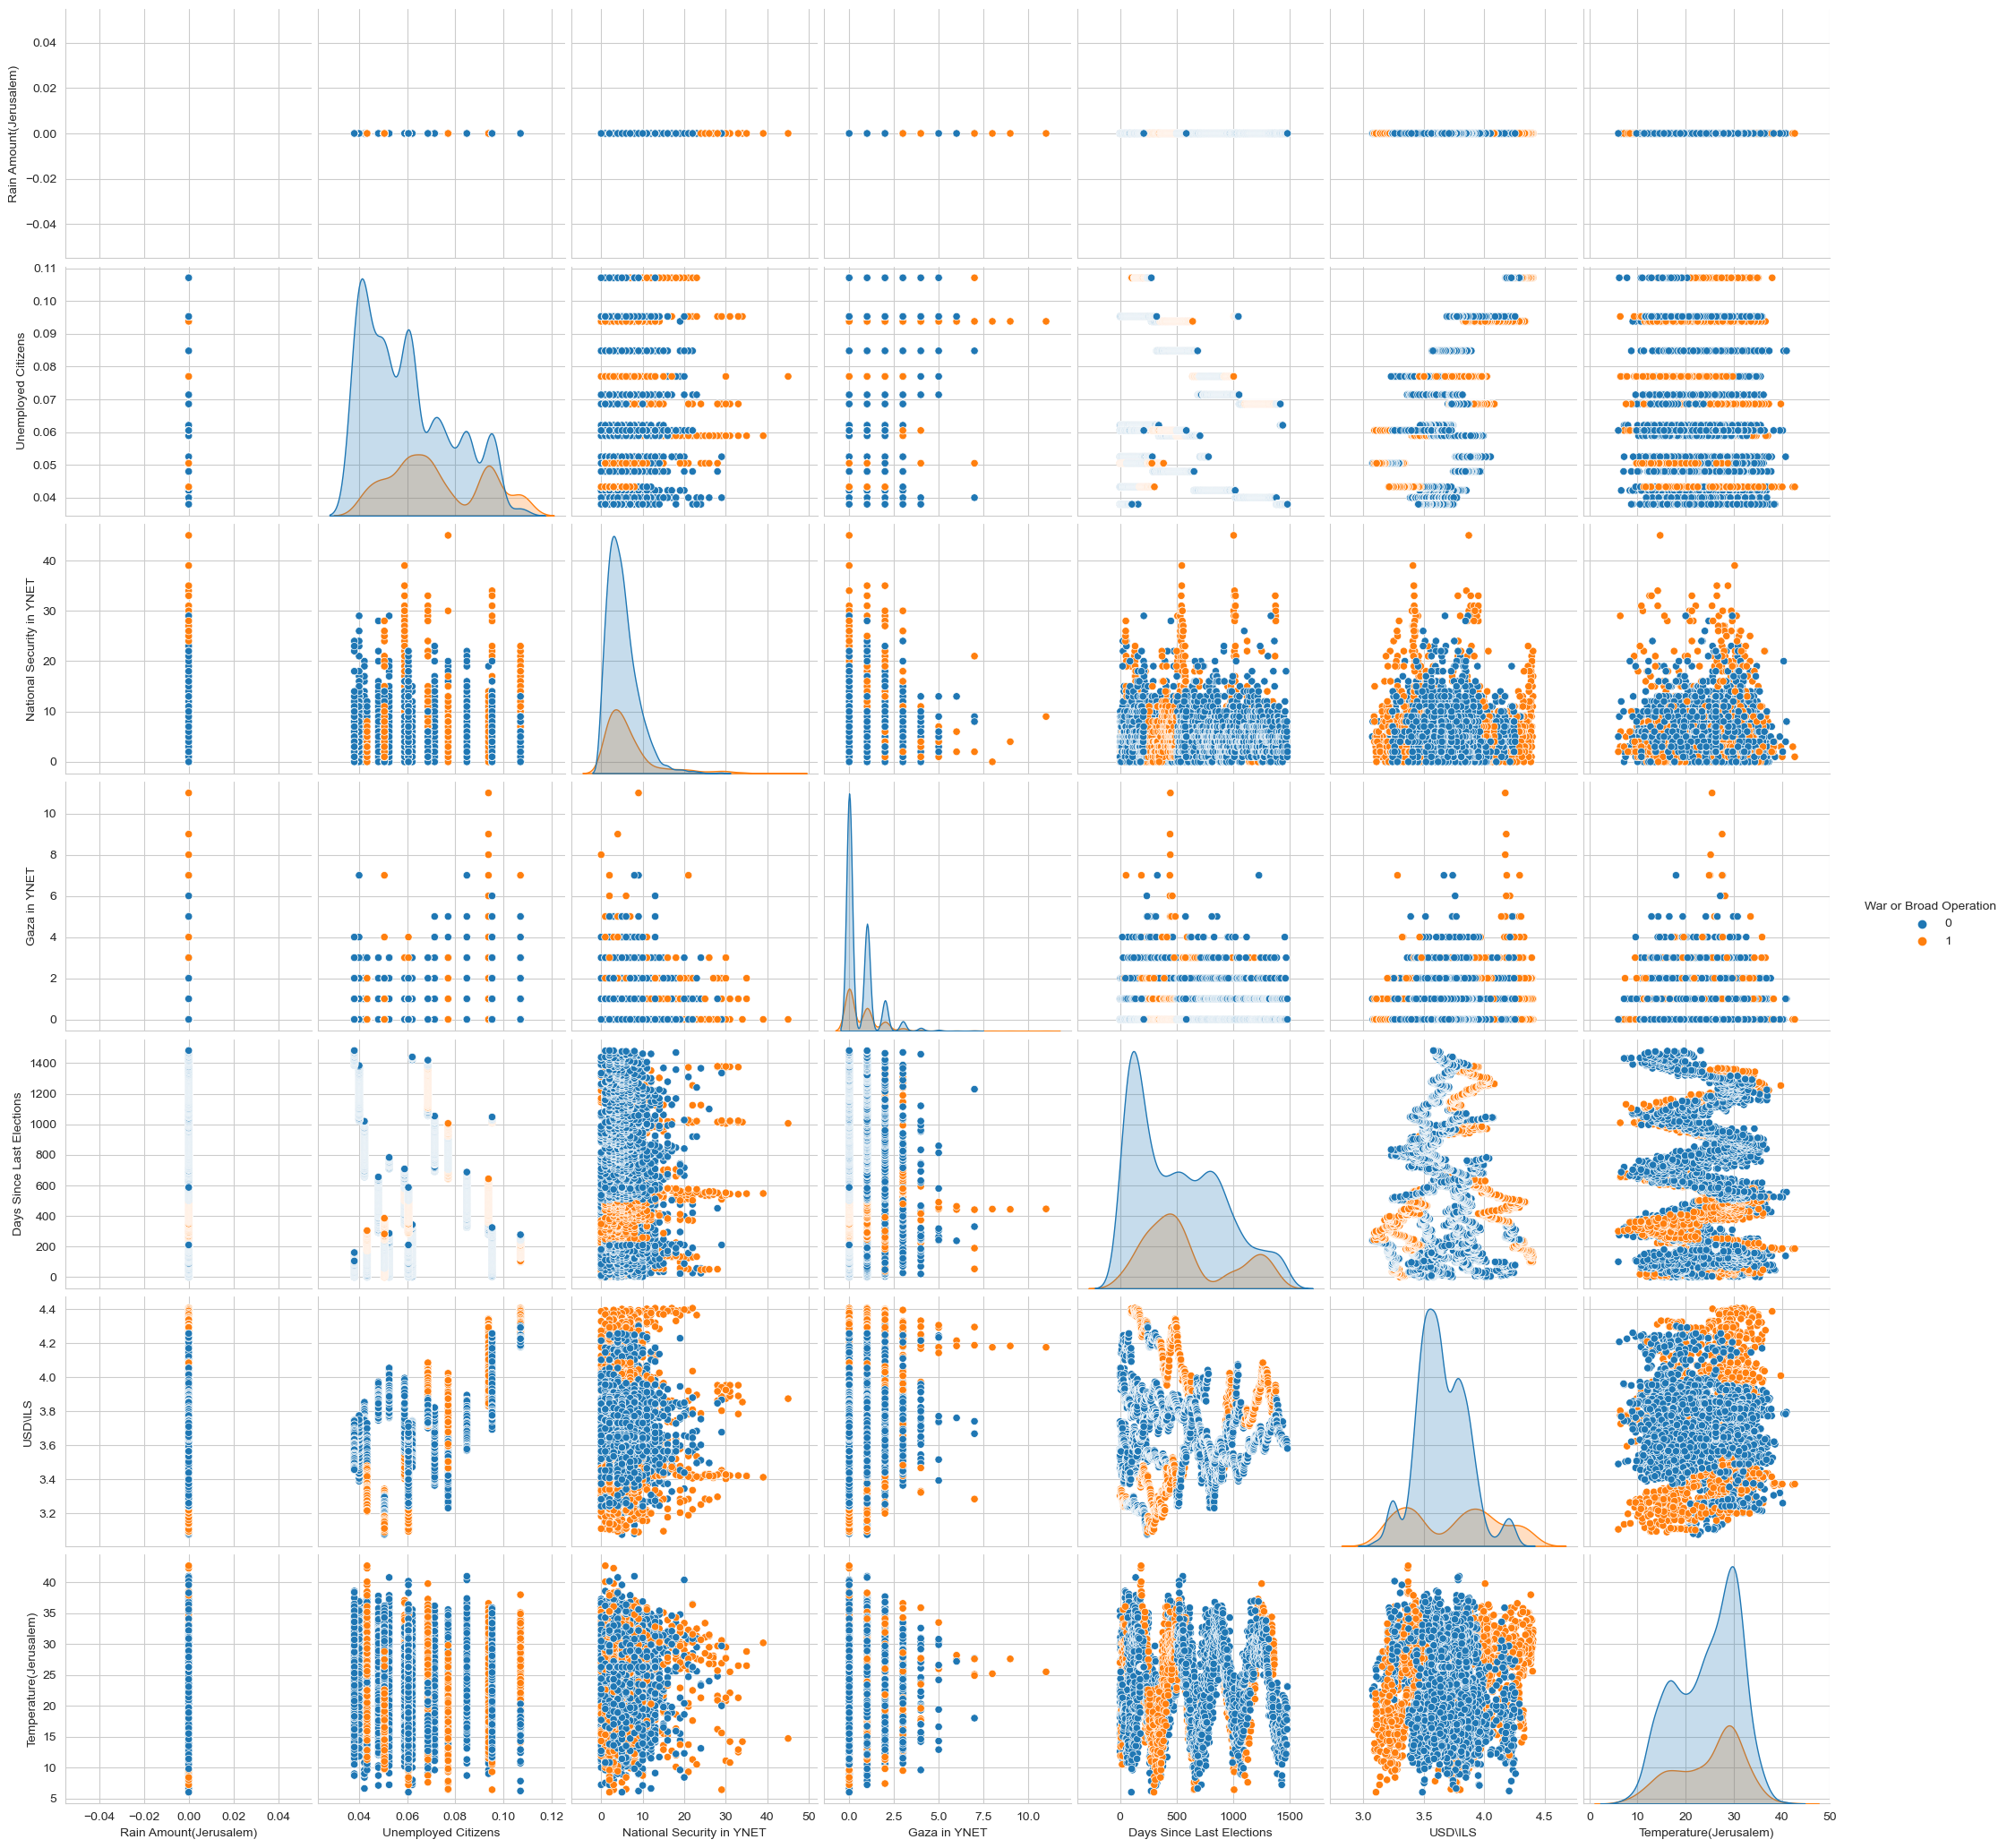

In [679]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(df_droped_na, hue='War or Broad Operation', height=3);
plt.show()

we can see that as we suspected the Rain column became irrelevant due to outliers and the Unemployed column doesn't provide much reliable data.

the best graphs are the ones related to Temperature, Election, USD\ILS, and YNET Articles. these are the graphs where we can see clearly the orange at War group and the blue not at War group.

to be more specific: orange dots are only groupd in the graphs between Days since last Elections and National Security in YNET.

In [680]:
df_droped_na['War or Broad Operation'].value_counts()

0    3980
1    1269
Name: War or Broad Operation, dtype: int64

let's create our train and test and run our knn modul with 3 neighbours:

In [770]:
df2=df_droped_na.copy()
df2= df2.drop(['Date'],axis=1)
X=df2[df2.columns[df2.columns != "War or Broad Operation"]]
y=df2["War or Broad Operation"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [771]:
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(XTrain, yTrain)


KNeighborsClassifier(n_neighbors=3)

In [772]:
y_pred=clf.predict(XTest)

print(metrics.confusion_matrix(y_true = yTest, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

[[  71  201]
 [  73 1245]]
Accuracy =  0.8276729559748428


C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The confusion Matrix that we got is: 
71 cases were identified as War, which were True (at War)
201 cases were identified as War, which were False (not at War)
73 cases were identified as not War, which were False (at War)
and 1245 cases were identified as not War, which were True (not at War)

The accuracy is 82%, which is great!

let's see how our model handels with more neighbours:

In [773]:
k_s=[]
train_accuracies=[]
test_accuracies=[]
for k in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(XTrain, yTrain)
    y_pred_train=clf.predict(XTrain)
    y_pred=clf.predict(XTest)
    k_s.append(k)
    train_accuracies.append(metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))
    test_accuracies.append(metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

df=pd.DataFrame({"k":k_s,"train_accuracy":train_accuracies,"test_accuracy":test_accuracies})
df

C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

k  train_accuracy  test_accuracy
0    1        1.000000       0.833962
1    2        0.934577       0.784906
2    3        0.926609       0.827673
3    4        0.913189       0.807547
4    5        0.893269       0.825157
5    6        0.890333       0.819497
6    7        0.875026       0.827044
7    8        0.875865       0.819497
8    9        0.864961       0.829560
9   10        0.865381       0.824528
10  11        0.856783       0.828931
11  12        0.859509       0.826415
12  13        0.853638       0.827673
13  14        0.853428       0.829560
14  15        0.849864       0.830189
15  16        0.850073       0.826415
16  17        0.848815       0.829560
17  18        0.848186       0.828302
18  19        0.846718       0.827673
19  20        0.848186       0.827044

we can see that adding more neighbours doesn't change too much. that is probably due to the fact that our dots are very grouped.

now let's see how our model will handel when he can't see the df at all:

In [774]:
clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(clf, X, y, cv=5)

scores

C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

array([0.65714286, 0.68761905, 0.4847619 , 0.45714286, 0.72259295])

In [775]:
print("Accuracy: %0.2f" % scores.mean())

Accuracy: 0.60


that was expected, and still quite high. let's search for the best k, this time using GridSearchCV:

In [776]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {'n_neighbors':range(3,25,2) }
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
clf.fit(XTrain, yTrain)

print("best parameter set is:",clf.best_params_," and its score was",clf.best_score_)

C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

best parameter set is: {'n_neighbors': 3}  and its score was 0.8437820762416379


C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

so we can see that the model has trained itself and got better at predicting the results, when it is exposed to the data it is more accurate and even when not, it is still right at 60% of the time. 

let's check what will happen if we drop the Rain, Gaza Articles and the Unemployment columns:

In [786]:
df3=df_droped_na.copy()
df3= df3.drop(columns=['Date','Rain Amount(Jerusalem)', 'Unemployed Citizens','Gaza in YNET'],axis=1)
X=df3[df3.columns[df3.columns != "War or Broad Operation"]]
y=df3["War or Broad Operation"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [787]:
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(XTrain, yTrain)

KNeighborsClassifier(n_neighbors=3)

In [788]:
y_pred=clf.predict(XTest)

print(metrics.confusion_matrix(y_true = yTest, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

[[  71  201]
 [  73 1245]]
Accuracy =  0.8276729559748428


C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [789]:
k_s=[]
train_accuracies=[]
test_accuracies=[]
for k in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(XTrain, yTrain)
    y_pred_train=clf.predict(XTrain)
    y_pred=clf.predict(XTest)
    k_s.append(k)
    train_accuracies.append(metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))
    test_accuracies.append(metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

df=pd.DataFrame({"k":k_s,"train_accuracy":train_accuracies,"test_accuracy":test_accuracies})
df

C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

k  train_accuracy  test_accuracy
0    1        1.000000       0.833962
1    2        0.934577       0.784906
2    3        0.926609       0.827673
3    4        0.913189       0.807547
4    5        0.893269       0.825157
5    6        0.890333       0.819497
6    7        0.875026       0.827044
7    8        0.875865       0.819497
8    9        0.864961       0.829560
9   10        0.865381       0.824528
10  11        0.856783       0.828931
11  12        0.859509       0.826415
12  13        0.853638       0.827673
13  14        0.853428       0.829560
14  15        0.849864       0.830189
15  16        0.850073       0.826415
16  17        0.848815       0.829560
17  18        0.848186       0.828302
18  19        0.846718       0.827673
19  20        0.848186       0.827044

In [790]:
clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(clf, X, y, cv=5)

scores

C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

array([0.65619048, 0.69714286, 0.49142857, 0.45428571, 0.72449952])

In [791]:
print("Accuracy: %0.2f" % scores.mean())

Accuracy: 0.60


In [792]:
parameters = {'n_neighbors':range(3,25,2) }
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
clf.fit(XTrain, yTrain)

print("best parameter set is:",clf.best_params_," and its score was",clf.best_score_)

C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

best parameter set is: {'n_neighbors': 3}  and its score was 0.8437820762416379


C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

nothing changed when using df3. that probably means these columns didn't affect our model. 
let's try removing a column that we believe that does have an affect: Elections

In [793]:
df4=df_droped_na.copy()
df4= df4.drop(columns=['Date','Rain Amount(Jerusalem)', 'Unemployed Citizens','Gaza in YNET','Days Since Last Elections'],axis=1)
X=df4[df4.columns[df4.columns != "War or Broad Operation"]]
y=df4["War or Broad Operation"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [794]:
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(XTrain, yTrain)

KNeighborsClassifier(n_neighbors=3)

In [795]:
y_pred=clf.predict(XTest)

print(metrics.confusion_matrix(y_true = yTest, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

[[  71  201]
 [  73 1245]]
Accuracy =  0.8276729559748428


C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [796]:
k_s=[]
train_accuracies=[]
test_accuracies=[]
for k in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(XTrain, yTrain)
    y_pred_train=clf.predict(XTrain)
    y_pred=clf.predict(XTest)
    k_s.append(k)
    train_accuracies.append(metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))
    test_accuracies.append(metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

df=pd.DataFrame({"k":k_s,"train_accuracy":train_accuracies,"test_accuracy":test_accuracies})
df

C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

k  train_accuracy  test_accuracy
0    1        1.000000       0.833962
1    2        0.934577       0.784906
2    3        0.926609       0.827673
3    4        0.913189       0.807547
4    5        0.893269       0.825157
5    6        0.890333       0.819497
6    7        0.875026       0.827044
7    8        0.875865       0.819497
8    9        0.864961       0.829560
9   10        0.865381       0.824528
10  11        0.856783       0.828931
11  12        0.859509       0.826415
12  13        0.853638       0.827673
13  14        0.853428       0.829560
14  15        0.849864       0.830189
15  16        0.850073       0.826415
16  17        0.848815       0.829560
17  18        0.848186       0.828302
18  19        0.846718       0.827673
19  20        0.848186       0.827044

In [797]:
clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(clf, X, y, cv=5)

scores

C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

array([0.75238095, 0.76666667, 0.74095238, 0.75904762, 0.75119161])

In [798]:
print("Accuracy: %0.2f" % scores.mean())

Accuracy: 0.75


In [799]:
parameters = {'n_neighbors':range(3,25,2) }
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
clf.fit(XTrain, yTrain)

print("best parameter set is:",clf.best_params_," and its score was",clf.best_score_)

C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

best parameter set is: {'n_neighbors': 3}  and its score was 0.8437820762416379


C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Naama Yaler\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

so we can see that in overall using GridSearchCV on df4 didn't change much, but when using cross_val on df4 our result improved. that is probably due to the fact that with a narrower df, predicting without seeing the whole picture is easier. 
the fact that it did change our results probably indicates that this column does has great affect on our model.

Now let's review another type of model, Naive Bayes, only this time let's run the model on df5, which will not have any columns that has a correlation between them, because as we learned this model doesn't work well when there is a correlation.
we will remove the Gaza articles column, because it might be related to the National security articles column, and for the same reason we will remove the Rain Amount column, because it is related to the Temperature column.

In [806]:
df5=df_droped_na.copy()
df5= df5.drop(columns=['Date','Rain Amount(Jerusalem)','Gaza in YNET'],axis=1)
X=df5[df5.columns[df5.columns != "War or Broad Operation"]]
y=df5["War or Broad Operation"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.naive_bayes import GaussianNB

G=GaussianNB()
G.fit(X_train, y_train)
print(G)

print(metrics.classification_report(y_test, G.predict(X_test)))
print(metrics.confusion_matrix(y_test, G.predict(X_test)))

GaussianNB()
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       988
           1       0.55      0.29      0.38       325

    accuracy                           0.77      1313
   macro avg       0.68      0.61      0.62      1313
weighted avg       0.74      0.77      0.74      1313

[[913  75]
 [232  93]]


The confusion Matrix that we got is: 
913 cases were identified as War, which were True (at War).
75 cases were identified as War, which were False (not at War)
232 cases were identified as not War, which were False (at War)
and 93 cases were identified as not War, which were True (not at War)

The accuracy is 77%, which is less then the knn, but also pretty good. on top of that, Naive Bayes doesn't suffer from overfitting, and knn does, so we tend to rely on Gaussian model more. 


so for conclusion, we found that given the parameters we inspected, the most effective parameters on a War in Israel are Money, Elections and Temeprature.
we understand now that taking measurments from one city is not enough, and that annual measurments doesn't come handy when dealing with daily rows. 
we learned how to use selenium, and how to read knn results, confusion matrix and how to use GaussianNB, how to build a df from scratch and solve many problems in scraping and handeling data along the way. 
we also build a prediction model that works. 

Thank you for your time and let there be peace every day (: